[View in Colaboratory](https://colab.research.google.com/github/fmacrae/AI-Learning/blob/master/Cross_Validation_Example.ipynb)

# Cross Validation
Process of deciding how to split your data into Training, Validation and Test sets.
Common strategy is called K Fold Cross Validation.  Where K is an arbitrary number of equal subdivisions (bins) of the full data set.  So 10 Fold Cross Validation would break the data into 10 equal sized groups.

Example sourced from https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 




# Import our libraries

1.   Pandas — to load the data file as a Pandas data frame and analyze the data
2.   From Sklearn, I’ve imported the datasets module, so I can load a sample dataset, and the linear_model, so I can run a linear regression
3.   From Sklearn, sub-library model_selection, I’ve imported the train_test_split so I can, well, split to training and test sets
4.   From Matplotlib I’ve imported pyplot in order to plot graphs of the data





# Load the Diabetes Housing dataset

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [0]:
# Load the Diabetes Housing dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

# Create train and Test Variables
This is the normal way of doing it - so no cross validation here

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


(353, 10) (353,)
(89, 10) (89,)


# Now Fit the Model

In [0]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Check what it predicts <BR>
[0:5] just means show the 1st 5 values

In [5]:
predictions[0:5]

array([208.24745176, 119.03261395,  92.15619897, 175.84934807,
        81.16595193])

# Plot the data

Text(0,0.5,u'Predictions')

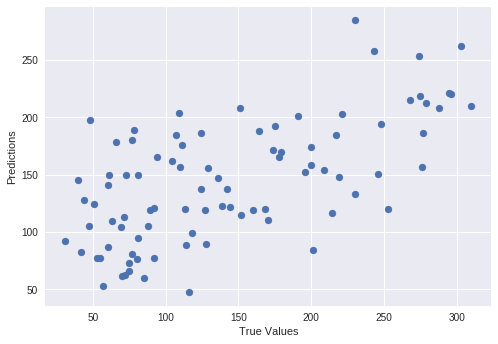

In [6]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Check accuracy

In [7]:
print "Score:", model.score(X_test, y_test)

Score: 0.4076972667661495


# Now for K Fold Cross Validation

In [8]:
import numpy as np
from sklearn.model_selection import KFold # import KFold
X2 = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y2 = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X2) # returns the number of splitting iterations in the cross-validator
print(kf) 


KFold(n_splits=2, random_state=None, shuffle=False)


Check the data

In [11]:
for train_index, test_index in kf.split(X2):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X2[train_index], X2[test_index]
 y_train, y_test = y2[train_index], y2[test_index]


('TRAIN:', array([2, 3]), 'TEST:', array([0, 1]))
('TRAIN:', array([0, 1]), 'TEST:', array([2, 3]))


# Leave One Out Cross Validation (LOOCV)

Leave this one out entirely.  Its only good for small datasets.

# Cross validation on the bigger diabetes dataset

In [12]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Try rescoring after cross validation

In [13]:
# Perform 6-fold cross validation
#df is the pada datafile we loaded
scores = cross_val_score(model, df, y, cv=6)
print "Cross-validated scores:", scores

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


Plot the new data

CPU times: user 122 ms, sys: 3 ms, total: 125 ms
Wall time: 126 ms


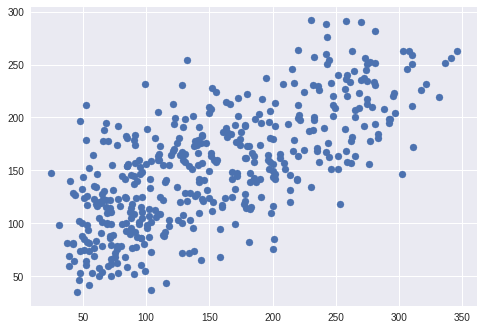

In [18]:
%%time
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=60)
plt.scatter(y, predictions)

You can see it’s very different from the original plot from earlier. It is six times as many points as the original plot because I used cv=6.

Finally, let’s check the R² score of the model (R² is a “number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s)”. Basically, how accurate is our model):

In [19]:
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

Cross-Predicted Accuracy: 0.4933809590742523
